# Preliminary Data Wrangling and Exploratory Data Analysis

Description of data:
This dataset contains labeled food images with 101 different categories. For each category there is 1,000 total images, making the total amount of images 101,000.

For this project the final split of the data will be 75% training images, 12.5% testing images, and 12.5% validation images.

This document will explore the dataset and will make preliminary insights about the dataset. The goal is to build a model that will be able to identify user generated photo's within these categories. 

# Import necessary packages and load .json

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # pyplot

import os, sys
from os import listdir
from os.path import isfile, join
import shutil
import stat
import collections
from collections import defaultdict
import PIL

from glob import glob
from IPython.display import display, Image


In [3]:
# load training dataframe
train_df = pd.read_json('../data/meta/test.json')
train_df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823


In [4]:
# load testing dataframe
test_df = pd.read_json('../data/meta/train.json')
test_df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150


### Random Samples Per Label

In [6]:
def gather_image_data(root_dir, food_dir):
    # root_dir = root directory of the image data
    # food_dir is the specific food directory you wish to gather the data from
    files_in_folder = os.listdir(os.path.join(root_dir,food_dir))
    random_image = np.random.choice(files_in_folder)
    return plt.imread(os.path.join(root_dir,food_dir,random_image))

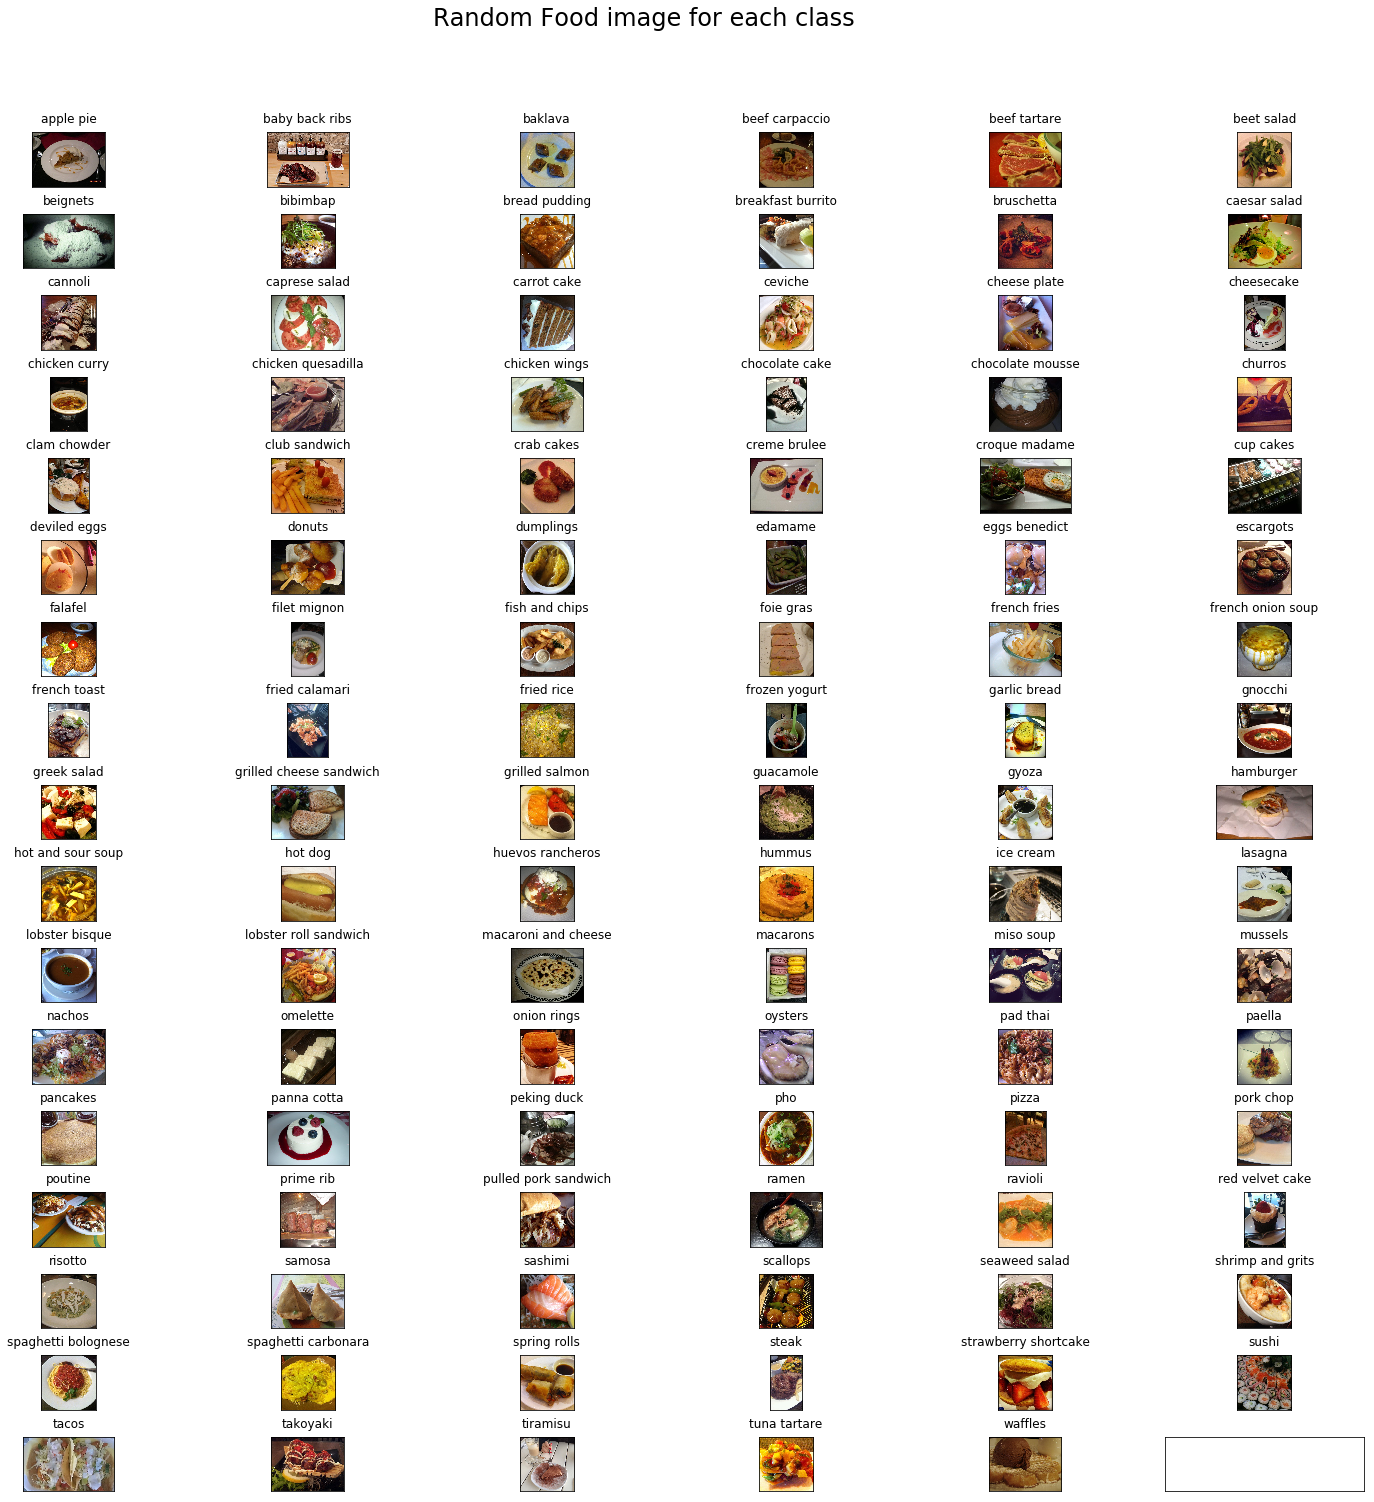

In [7]:
# setup root directory and grid size
root_dir = '../data/images'
row = 17
col = 6

# initiate subplot and configure title
fig, ax = plt.subplots(row,col,figsize=(25,25))
fig.suptitle("Random Food image for each class", y=.95, fontsize=24)
plt.setp(ax, xticks=[],yticks=[])
plt.subplots_adjust(hspace=0.5)

# gather food directory's for all 101 types of food
sorted_food_dirs = sorted(os.listdir(root_dir))

# iterate through each category of food and assign a random image to a spot on the grid
for i in range(row):
    for j in range(col):
        try:
            food_dir = sorted_food_dirs[i * col + j]
        except:
            break
        img = gather_image_data(root_dir,food_dir)
        ax[i][j].imshow(img)
        ax[i][j].set_title(food_dir.replace("_"," "), pad = 10)


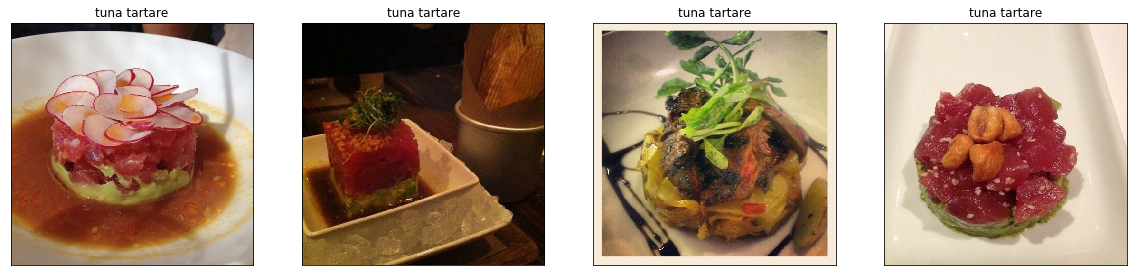

In [84]:
root_dir = '../data/images'
# Select a food directory from above to display images from it
food_dir = 'tuna tartare'.replace(" ","_")
files_in_folder = os.listdir(os.path.join(root_dir,food_dir))

# initiate subplot
fig, ax = plt.subplots(1,4,figsize=(20,15))
plt.setp(ax, xticks=[],yticks=[])

# fill 4 subplots
for i in range(4):
    img = gather_image_data(root_dir,food_dir)
    ax[i].imshow(img)
    ax[i].set_title(food_dir.replace("_"," "))

### Review JSON Data
It appears that the .json data is seperated by label with a list of file locations for the images.

In [9]:
train_df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823


In [10]:
test_df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,...,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,...,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/1016791,hot_and_sour_soup/1008185,samosa/101365,sashimi/1002556,pork_chop/1019530,spring_rolls/1003507,panna_cotta/1011097,beef_tartare/1009672,greek_salad/1010520,foie_gras/1011711,...,chicken_quesadilla/1011413,pho/1012513,prime_rib/100945,cheesecake/1004807,ice_cream/102595,omelette/1015300,grilled_cheese_sandwich/1007544,lobster_roll_sandwich/100646,nachos/1011394,oysters/1023832
3,churros/102100,hot_and_sour_soup/1008701,samosa/1015943,sashimi/1007253,pork_chop/1019569,spring_rolls/1008736,panna_cotta/1013000,beef_tartare/1012128,greek_salad/1011665,foie_gras/1017233,...,chicken_quesadilla/1023828,pho/1019401,prime_rib/10120,cheesecake/1017408,ice_cream/1044117,omelette/1029915,grilled_cheese_sandwich/1013343,lobster_roll_sandwich/100655,nachos/1013641,oysters/103236
4,churros/1025494,hot_and_sour_soup/1008924,samosa/1016296,sashimi/1010510,pork_chop/1025391,spring_rolls/1012525,panna_cotta/1020036,beef_tartare/1027680,greek_salad/1012989,foie_gras/1023512,...,chicken_quesadilla/1024740,pho/1021371,prime_rib/1016126,cheesecake/1021942,ice_cream/104465,omelette/1038109,grilled_cheese_sandwich/1016030,lobster_roll_sandwich/100702,nachos/1014846,oysters/1038150


### Copy Train and Test images into respective folders

In [2]:
# create functions for copying files and ignoring files

def copytree(src, dst, ignored_ids = None):
    # src = source directory
    # dst = destination directory of copy
    # ignore = ignore function that provides list of id's to ignore based on testing or training set
    
    # if destination directory does not exist, create directory
    if not os.path.exists(dst):
        os.makedirs(dst)
        shutil.copystat(src, dst)
    
    # get list of directories in current directory
    directory_items = os.listdir(src)
    # filter out items to be ignored
    directory_items = [x for x in directory_items if x not in ignored_ids]
    # for each item in directory, copy into destination
    for item in directory_items:
        source = os.path.join(src, item)
        destination = os.path.join(dst, item)
        # if item is a directory, recurisvely call this function 
        if os.path.isdir(source):
            print(source)
            copytree(source, destination, ignored_ids)
        # copy item to destination
        else:
            shutil.copy2(source, destination)

# generate list of folders and filenames in directory from metadata txt file
# returns a list
def generate_dir_file_map(path):
    dir_files = defaultdict(list)
    with open(path, 'r') as txt:
        files = [l.strip() for l in txt.readlines()]
        for f in files:
            dir_name, id = f.split('/')
            dir_files[dir_name].append(id + '.jpg')
    return dir_files

# generate list of id's of training images
def generate_training_ids():
    train_dir_files = generate_dir_file_map('../data/meta/train.txt')
    ids_to_ignore = list()
    for category in train_dir_files:
        for file in train_dir_files[category]:
            ids_to_ignore.append(file)
    return ids_to_ignore

# generate list of id's of using the first half of the testing images
def generate_testing_ids():
    test_dir_categories = generate_dir_file_map('../data/meta/test.txt')
    ids_to_ignore = list()
    for category in test_dir_categories:
        first_half_of_test_ids = test_dir_categories[category][:len(test_dir_categories[category])//2]
        for image_id in first_half_of_test_ids:
            ids_to_ignore.append(image_id)
    return ids_to_ignore

# generate list of id's of using the second half of the testing images
def generate_validation_ids():
    test_dir_categories = generate_dir_file_map('../data/meta/test.txt')
    ids_to_ignore = list()
    for category in test_dir_categories:
        second_half_of_test_ids = test_dir_categories[category][len(test_dir_categories[category])//2:]
        for image_id in second_half_of_test_ids:
            ids_to_ignore.append(image_id)
    return ids_to_ignore

In [60]:
len(generate_testing_ids())

12625

In [5]:
def sort_images():
    # Only split files if haven't already
    ids_to_ignore_for_training = generate_testing_ids() + generate_validation_ids()
    ids_to_ignore_for_testing = generate_training_ids() + generate_validation_ids()
    ids_to_ignore_for_validation = generate_testing_ids() + generate_training_ids()
    
    root_dir = '../data/images'
    train_dir = '../data/train'
    test_dir = '../data/test'
    valid_dir = '../data/valid'
    
    if not os.path.isdir('../data/test') and not os.path.isdir('../data/train'):
        copytree(root_dir, train_dir, ignored_ids=ids_to_ignore_for_training)
    else:
        print('Train files already copied into separate folders.')

    if not os.path.isdir('../data/test'):
        copytree(root_dir, test_dir, ignored_ids=ids_to_ignore_for_testing)
    else:
        print('Test files already copied into separate folders.')

    if not os.path.isdir('../data/validation'):
        copytree(root_dir, valid_dir, ignored_ids=ids_to_ignore_for_validation)
    else:
        print('Validation files already copied into separate folders.')
        
sort_images()

Train files already copied into separate folders.
Test files already copied into separate folders.
Validation files already copied into separate folders.


### Resize all images to standard size for Deep Learning Models

In [65]:
# take root path and label name of training or test directories and makes copies at a standard pixel size
def resize_aspect_fit(path, directory,category, height, width):
    images = os.listdir("{}/{}".format(path,directory))
    for item in images:
        if item == '.DS_Store':
             continue
        if os.path.isfile("{}/{}/{}".format(path,directory,item)):
            save_path = "../data/resized/{}/{}/{}".format(category, directory, item)
            im = PIL.Image.open("{}/{}/{}".format(path,directory,item))
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, PIL.Image.ANTIALIAS)
            new_im = PIL.Image.new("RGB", (height, width))
            new_im.paste(im, ((width-new_image_size[0])//2, (height-new_image_size[1])//2))
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            new_im.save(save_path, 'JPEG', quality=90)
    print("Finished resizing images from {} {} set".format(directory, category))

In [83]:
# initialize variable
train_path = "../data/train"
test_path = "../data/test"
validation_path = "../data/validation"
train_dirs = os.listdir(train_path)
test_dirs = os.listdir(test_path)
validation_dirs = os.listdir(validation_path)
final_size = 256;

if not os.path.isdir('../data/resized') and not os.path.isdir('../data/resized'):
    for directory in train_dirs:
        resize_aspect_fit(train_path,directory,'train',final_size,final_size)
    for directory in test_dirs:
        resize_aspect_fit(test_path,directory,'test',final_size,final_size)
    for directory in validation_dirs:
        resize_aspect_fit(validation_path, directory, 'validation',final_size, final_size)
else:
    print('Train/Test files already resized')


Finished resizing images from apple_pie training set
Finished resizing images from baby_back_ribs training set
Finished resizing images from baklava training set
Finished resizing images from beef_carpaccio training set
Finished resizing images from beef_tartare training set
Finished resizing images from beet_salad training set
Finished resizing images from beignets training set
Finished resizing images from bibimbap training set
Finished resizing images from bread_pudding training set
Finished resizing images from breakfast_burrito training set
Finished resizing images from bruschetta training set
Finished resizing images from caesar_salad training set
Finished resizing images from cannoli training set
Finished resizing images from caprese_salad training set
Finished resizing images from carrot_cake training set
Finished resizing images from ceviche training set
Finished resizing images from cheesecake training set
Finished resizing images from cheese_plate training set
Finished resiz

Finished resizing images from grilled_salmon testing set
Finished resizing images from guacamole testing set
Finished resizing images from gyoza testing set
Finished resizing images from hamburger testing set
Finished resizing images from hot_and_sour_soup testing set
Finished resizing images from hot_dog testing set
Finished resizing images from huevos_rancheros testing set
Finished resizing images from hummus testing set
Finished resizing images from ice_cream testing set
Finished resizing images from lasagna testing set
Finished resizing images from lobster_bisque testing set
Finished resizing images from lobster_roll_sandwich testing set
Finished resizing images from macaroni_and_cheese testing set
Finished resizing images from macarons testing set
Finished resizing images from miso_soup testing set
Finished resizing images from mussels testing set
Finished resizing images from nachos testing set
Finished resizing images from omelette testing set
Finished resizing images from onion

Finished resizing images from spring_rolls validationing set
Finished resizing images from steak validationing set
Finished resizing images from strawberry_shortcake validationing set
Finished resizing images from sushi validationing set
Finished resizing images from tacos validationing set
Finished resizing images from takoyaki validationing set
Finished resizing images from tiramisu validationing set
Finished resizing images from tuna_tartare validationing set
Finished resizing images from waffles validationing set


### Create an organized dataframe that is easy to work with and save as .csv

In [72]:
# get dictionary and turn into training data frame, testing dataframe
food_labels = pd.read_csv('../data/meta/labels.txt', header=None)
food_labels = food_labels[0].tolist()
data = []

# prepare data for dataframe
for label in food_labels:
    food_class = label.lower().replace(" ", "_")
    training_locations = train_df[food_class]
    testing_locations = test_df[food_class]
    for item in training_locations:
        data.append([food_class.lower(), label, food_labels.index(label),
                     item.replace(label + '/',''), '../data/test/' + item, 0])
    for item in testing_locations:
        data.append([food_class.lower(), label, food_labels.index(label),
                     item.replace(label + "/",''),'../data/train/' + item + ".jpg", 1])

# create dataframe
df = pd.DataFrame(data, columns=['food_class','label','label_id','photo_id','path','training_image',])

In [74]:
# save csv file for dataframe
if not os.path.exists('../data/meta/working_df.csv'):
    df.to_csv('../data\meta\working_df.csv', index=False)
    print("CSV Created successfully")
else:
    print("CSV already exists")


CSV Created successfully


In [75]:
# test if creation of csv worked
df = pd.read_csv('../data/meta/working_df.csv')
df.head()

,food_class,label,label_id,photo_id,path,training_image
0,apple_pie,Apple pie,0,apple_pie/1011328,../data/test/apple_pie/1011328,0
1,apple_pie,Apple pie,0,apple_pie/101251,../data/test/apple_pie/101251,0
2,apple_pie,Apple pie,0,apple_pie/1034399,../data/test/apple_pie/1034399,0
3,apple_pie,Apple pie,0,apple_pie/103801,../data/test/apple_pie/103801,0
4,apple_pie,Apple pie,0,apple_pie/1038694,../data/test/apple_pie/1038694,0


In [76]:
# make smaller subset of data
sub_train_data = []
sub_test_data = []
labels = df['label'].unique().tolist()
for label in labels:
    rows = df[df['label'] == label]
    # change this value to change amount of training images
    training = rows[rows['training_image'] == 1]
    testing = rows[rows['training_image'] == 0]
    for i in range(60):
        # map over values from training into array
        food_class = training['food_class'].values[i]
        label = training['label'].values[i]
        label_id = training['label_id'].values[i]
        food_id = training['photo_id'].values[i]
        path = training['path'].values[i]
        training_image = training['training_image'].values[i]
        sub_train_data.append([food_class, label, label_id, food_id, path, training_image])
    for i in range(20):
        # map over values from testing into array
        food_class = testing['food_class'].values[i]
        label = testing['label'].values[i]
        label_id = testing['label_id'].values[i]
        food_id = testing['photo_id'].values[i]
        path = testing['path'].values[i]
        training_image = testing['training_image'].values[i]
        sub_test_data.append([food_class, label, label_id, food_id, path, training_image])

In [77]:
# create dataframe for training of data
sub_train_data = pd.DataFrame(sub_train_data, columns=['food_class','label','label_id','photo_id','path','training_image'])
sub_train_data.shape

(6060, 6)

In [78]:
sub_train_data.head()

,food_class,label,label_id,photo_id,path,training_image
0,apple_pie,Apple pie,0,apple_pie/1005649,../data/train/apple_pie/1005649.jpg,1
1,apple_pie,Apple pie,0,apple_pie/1014775,../data/train/apple_pie/1014775.jpg,1
2,apple_pie,Apple pie,0,apple_pie/1026328,../data/train/apple_pie/1026328.jpg,1
3,apple_pie,Apple pie,0,apple_pie/1028787,../data/train/apple_pie/1028787.jpg,1
4,apple_pie,Apple pie,0,apple_pie/1043283,../data/train/apple_pie/1043283.jpg,1


In [79]:
# create dataframe for testing of data
sub_test_data = pd.DataFrame(sub_test_data, columns=['food_class','label','label_id','photo_id','path','training_image'])
sub_test_data.head()

,food_class,label,label_id,photo_id,path,training_image
0,apple_pie,Apple pie,0,apple_pie/1011328,../data/test/apple_pie/1011328,0
1,apple_pie,Apple pie,0,apple_pie/101251,../data/test/apple_pie/101251,0
2,apple_pie,Apple pie,0,apple_pie/1034399,../data/test/apple_pie/1034399,0
3,apple_pie,Apple pie,0,apple_pie/103801,../data/test/apple_pie/103801,0
4,apple_pie,Apple pie,0,apple_pie/1038694,../data/test/apple_pie/1038694,0


In [80]:
# create dataframe for test subset of data
if not os.path.exists('../data/meta/working_test_subset.csv'):
    sub_test_data.to_csv('../data/meta/working_test_subset.csv', index=False)
    print("CSV Created successfully")
else:
    print("CSV already exists")

CSV Created successfully


In [81]:
# create dataframe for training subset of data
if not os.path.exists('../data/meta/working_training_subset.csv'):
    sub_train_data.to_csv('../data/meta/working_training_subset.csv', index=False)
    print("CSV Created successfully")
else:
    print("CSV already exists")

CSV Created successfully
